In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm

In [24]:
df=pd.read_csv('happiness_score_dataset.csv')

In [25]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Checking the shape of the dataset

In [26]:
df.shape

(158, 12)

There are 158 rows and 12 columns

checking null values

In [33]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [34]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [35]:
df.drop(['Region','Standard Error', 'Dystopia Residual'],axis=1,inplace=True) 

In [36]:
df.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


In [99]:
evaluation = pd.DataFrame({'Model':[],
                          'Details':[],
                          'Root Mean Squared Error (RMSE)': [],
                          'R-squared (training)': [],
                          'Adjusted R-squared (training)': [],
                          'R-squared (test)':[],
                          'Adjusted R-squared(test)':[],
                           '5-Fold Cross Validation':[]
                        })

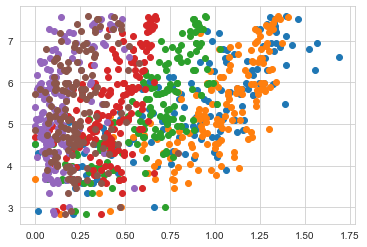

In [67]:
'''Happiness score vs gdp per capital'''
plt.scatter(x=df['Economy (GDP per Capita)'], y=df['Happiness Score'])
plt.scatter(x=df['Family'],y=df['Happiness Score'])
plt.scatter(x=df['Health (Life Expectancy)'],y=df['Happiness Score'])
plt.scatter(x=df['Freedom'],y=df['Happiness Score'])
plt.scatter(x=df['Trust (Government Corruption)'],y=df['Happiness Score'])
plt.scatter(x=df['Generosity'],y=df['Happiness Score'])

In [100]:
train_data, test_data = train_test_split(df, train_size = 0.8, random_state = 3)
lr = LinearRegression()
X_train = np.array(train_data['Economy (GDP per Capita)'],
                   dtype = pd.Series).reshape(-1,1)
y_train = np.array(train_data['Happiness Score'], dtype = pd.Series)
lr.fit(X_train, y_train)
X_test = np.array(test_data['Economy (GDP per Capita)'], 
                    dtype = pd.Series).reshape(-1,1)
y_test = np.array(test_data['Happiness Score'], dtype = pd.Series)
pred = lr.predict(X_test)

In [101]:
#ROOT MEAN SQUARED ERROR
rmsesm = float(format(np.sqrt(mean_squared_error(y_test,pred)),'.3f'))
#R-SQUARED (TRAINING)
rtrsm = float(format(lr.score(X_train, y_train),'.3f'))
#R-SQUARED (TEST)
rtesm = float(format(lr.score(X_test, y_test),'.3f'))
cv = float(format(cross_val_score(lr,df[['Economy (GDP per Capita)']],df['Happiness Score'],cv=5).mean(),'.3f'))
print ("Average Score for Test Data: {:.3f}".format(y_test.mean()))
print('Intercept: {}'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))
r = evaluation.shape[0]
evaluation.loc[r] = ['Simple Linear Regression','-',rmsesm,rtrsm,'-',rtesm,'-',cv]
evaluation

Average Score for Test Data: 5.528
Intercept: 3.4716114234678868
Coefficient: [2.19336749]


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
0,Simple Linear Regression,-,0.686,0.592,-,0.657,-,-10.133


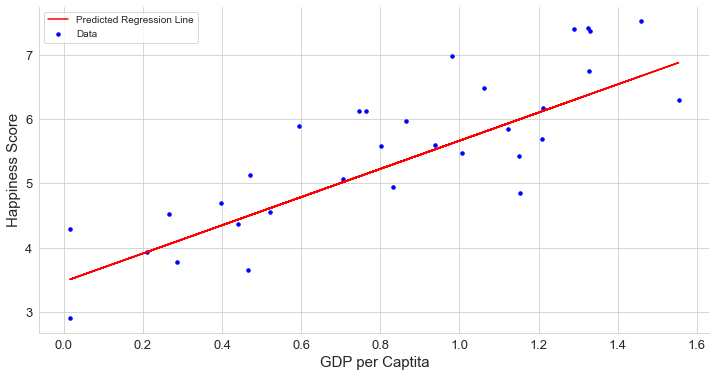

In [102]:
sns.set_style(style='whitegrid')
plt.figure(figsize=(12,6))
plt.scatter(X_test,y_test,color='blue',label="Data", s = 12)
plt.plot(X_test,lr.predict(X_test),color="red",label="Predicted Regression Line")
plt.xlabel("GDP per Captita", fontsize=15)
plt.ylabel("Happiness Score", fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

[None, None, None, None, None, None]

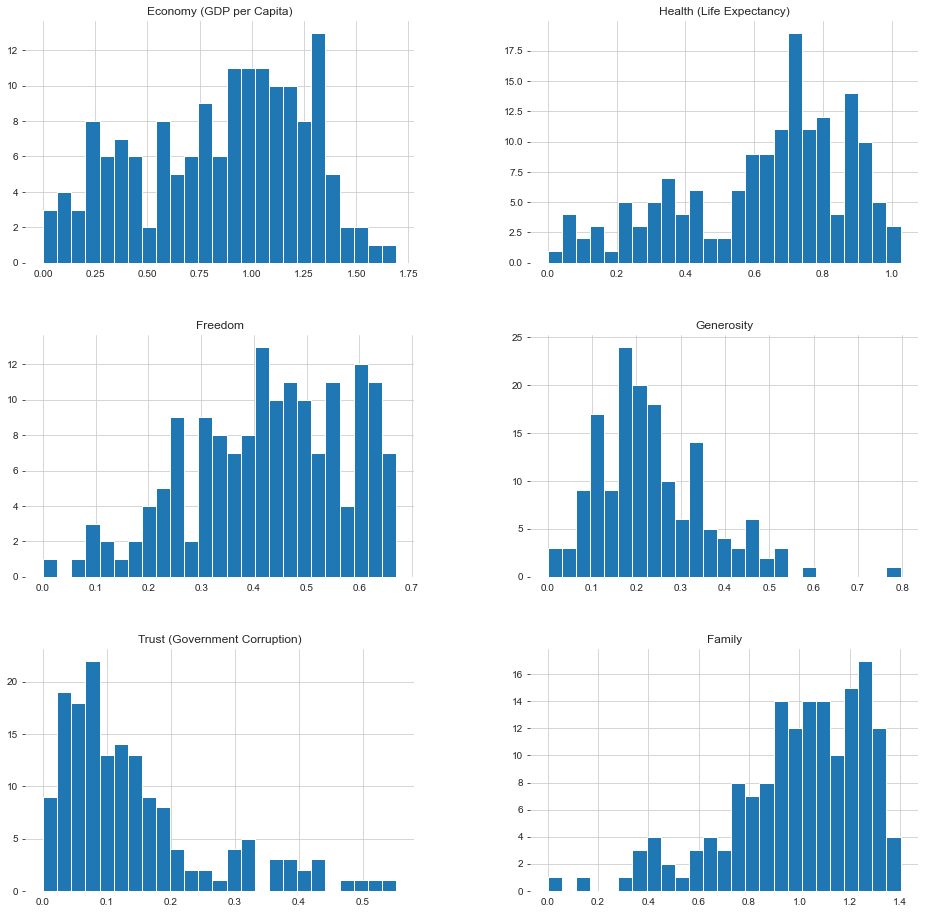

In [73]:
# DISTRIBUTION OF ALL NUMERIC DATA
plt.rcParams['figure.figsize'] = (15, 15)
df1 = df[['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
              'Generosity','Trust (Government Corruption)','Family']]
h = df1.hist(bins = 25, figsize = (16,16),
             xlabelsize = '10', ylabelsize = '10')
sns.despine(left = True, bottom = True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()]

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Country'>

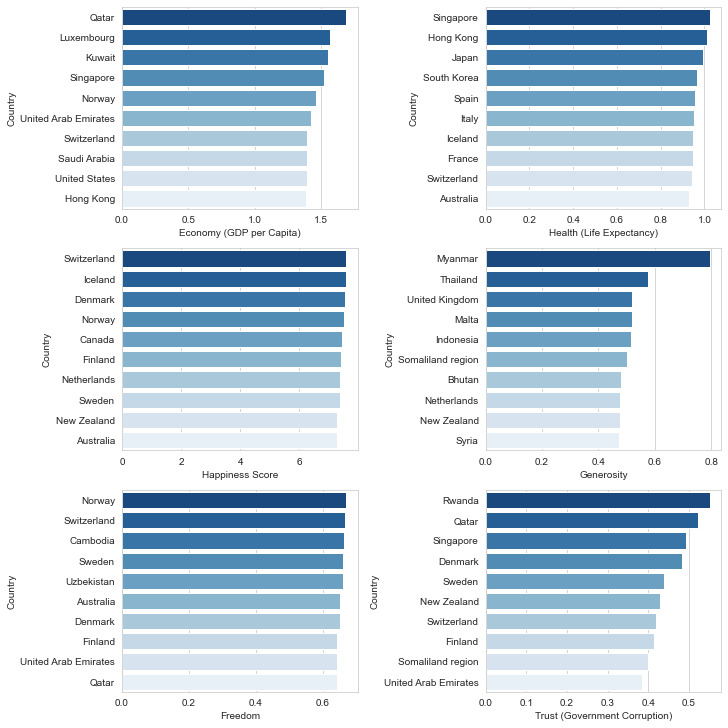

In [75]:
# Top Countries based on different criterias
fig, axes = plt.subplots(nrows=3, ncols=2,constrained_layout=True,figsize=(10,10))
sns.barplot(x='Economy (GDP per Capita)',y='Country',
                        data=df.nlargest(10,'Economy (GDP per Capita)'),
                        ax=axes[0,0],palette="Blues_r")
sns.barplot(x='Health (Life Expectancy)' ,y='Country',
                        data=df.nlargest(10,'Health (Life Expectancy)'),
                        ax=axes[0,1],palette='Blues_r')
sns.barplot(x='Happiness Score' ,y='Country',
                        data=df.nlargest(10,'Happiness Score'),
                        ax=axes[1,0],palette='Blues_r')
sns.barplot(x='Generosity' ,y='Country',
                        data=df.nlargest(10,'Generosity'),
                        ax=axes[1,1],palette='Blues_r')
sns.barplot(x='Freedom' ,y='Country',
                        data=df.nlargest(10,'Freedom'),
                        ax=axes[2,0],palette='Blues_r')
sns.barplot(x='Trust (Government Corruption)' ,y='Country',
                        data=df.nlargest(10,'Trust (Government Corruption)'),
                        ax=axes[2,1],palette='Blues_r')

To create a model with all features

In [103]:
def adjustedR2(R2,X,y):
    return (1 - (1-R2)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [104]:
# MULTIPLE LINEAR REGRESSION 1
train_data_dm,test_data_dm = train_test_split(df,train_size = 0.8,random_state=3)
independent_var = ['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom',
                   'Generosity','Trust (Government Corruption)','Family']
complex_model_1 = LinearRegression()
complex_model_1.fit(train_data_dm[independent_var],train_data_dm['Happiness Score'])
print('Intercept: {}'.format(complex_model_1.intercept_))
print('Coefficients: {}'.format(complex_model_1.coef_))
print('Happiness score = ',np.round(complex_model_1.intercept_,4),
      '+',np.round(complex_model_1.coef_[0],4),'∗ Family',
      '+',np.round(complex_model_1.coef_[1],4),'* Economy (GDP per Capita)', 
      '+',np.round(complex_model_1.coef_[2],4),'* Health (Life Expectancy)',
      '+',np.round(complex_model_1.coef_[3],4),'* Freedom',
       '+',np.round(complex_model_1.coef_[4],4),'* Generosity',
      '+',np.round(complex_model_1.coef_[5],4),'* Trust (Government Corruption)')

pred = complex_model_1.predict(test_data_dm[independent_var])
rmsecm = float(format(np.sqrt(mean_squared_error(
                       test_data_dm['Happiness Score'],pred)),'.3f'))
rtrcm = float(format(complex_model_1.score(
                        train_data_dm[independent_var],
                        train_data_dm['Happiness Score']),'.3f'))
artrcm = float(format(adjustedR2(complex_model_1.score(
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),
                        train_data_dm[independent_var],train_data_dm['Happiness Score']),'.3f'))
rtecm = float(format(complex_model_1.score(
                        test_data_dm[independent_var],
                        test_data_dm['Happiness Score']),'.3f'))

artecm = float(format(adjustedR2(complex_model_1.score(
                        test_data_dm[independent_var],test_data['Happiness Score']),
                        test_data_dm[independent_var],test_data_dm['Happiness Score']),'.3f'))
cv = float(format(cross_val_score(complex_model_1,
                    df[independent_var],
                    df['Happiness Score'],cv=5).mean(),'.3f'))
r = evaluation.shape[0]
evaluation.loc[r] = ['Multiple Linear Regression-1','selected features',rmsecm,rtrcm,artrcm,rtecm,artecm,cv]
evaluation.sort_values(by = '5-Fold Cross Validation', ascending=False)

Intercept: 1.8280680048770859
Coefficients: [0.94963075 0.79787549 1.35410705 0.3888729  0.65080418 1.4529232 ]
Happiness score =  1.8281 + 0.9496 ∗ Family + 0.7979 * Economy (GDP per Capita) + 1.3541 * Health (Life Expectancy) + 0.3889 * Freedom + 0.6508 * Generosity + 1.4529 * Trust (Government Corruption)


,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared(test),5-Fold Cross Validation
1,Multiple Linear Regression-1,selected features,0.540,0.771,0.759,0.788,0.737,-5.827
0,Simple Linear Regression,-,0.686,0.592,-,0.657,-,-10.133
